In [4]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install opencv-python
%pip install seaborn

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 992.2 kB/s eta 0:05:35
   ---------------------------------------- 0.5/332.0 MB 992.2 kB/s eta 0:05:35
   ---------------------------------------- 0.8/332.0 MB 898.6 kB/s eta 0:06:09
   ---------------------------------------- 1.0/332.0 MB 1.0 MB/s eta 0:05:26
   ---------------------------------------- 1.3/332.0 MB 1.1 MB/s eta 0:05:11
   ---------------------------------------- 1.8/332.0 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 2.1/332.0 MB 1.1 MB/s eta 0:04:48
   ---------------------------------------- 2.4/332.0 MB 1.2 MB/s eta 0:04:30
   ---------------------------------------- 2.9/332.0 MB 1.3 MB/s eta 0:04:06
   -------------

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

c:\Users\ankan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [6]:
'''from google.colab import drive
drive.mount('/content/drive')
import os
print(os.path.exists('/content/drive/MyDrive/solar_project/Faulty_solar_panel'))'''

dataset_path = r"C:\solar\Solar-Panel-Fault-Detection\Faulty_solar_panel"
import os
print(os.path.exists(dataset_path))



True


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 885 files belonging to 6 classes.


Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

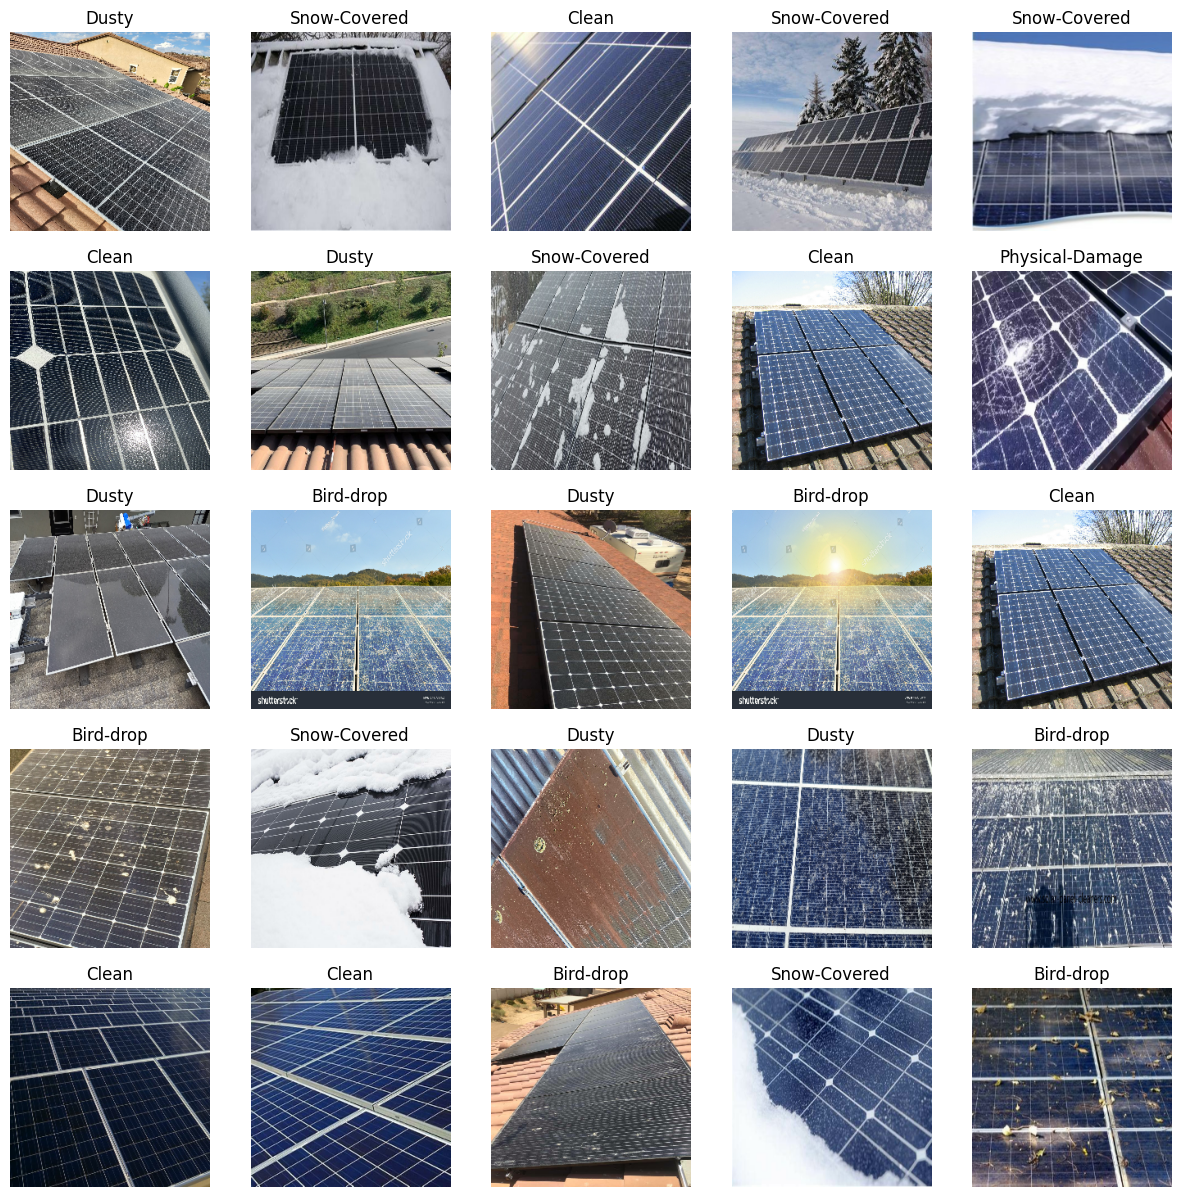

In [10]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model Training

In [11]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [12]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 244, 244,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 244, 244,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 90)        │     46,170 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,760,858 (56.31 MB)

 Trainable params: 46,170 (180.35 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
pip install pydot 


Note: you may need to restart the kernel to use updated packages.


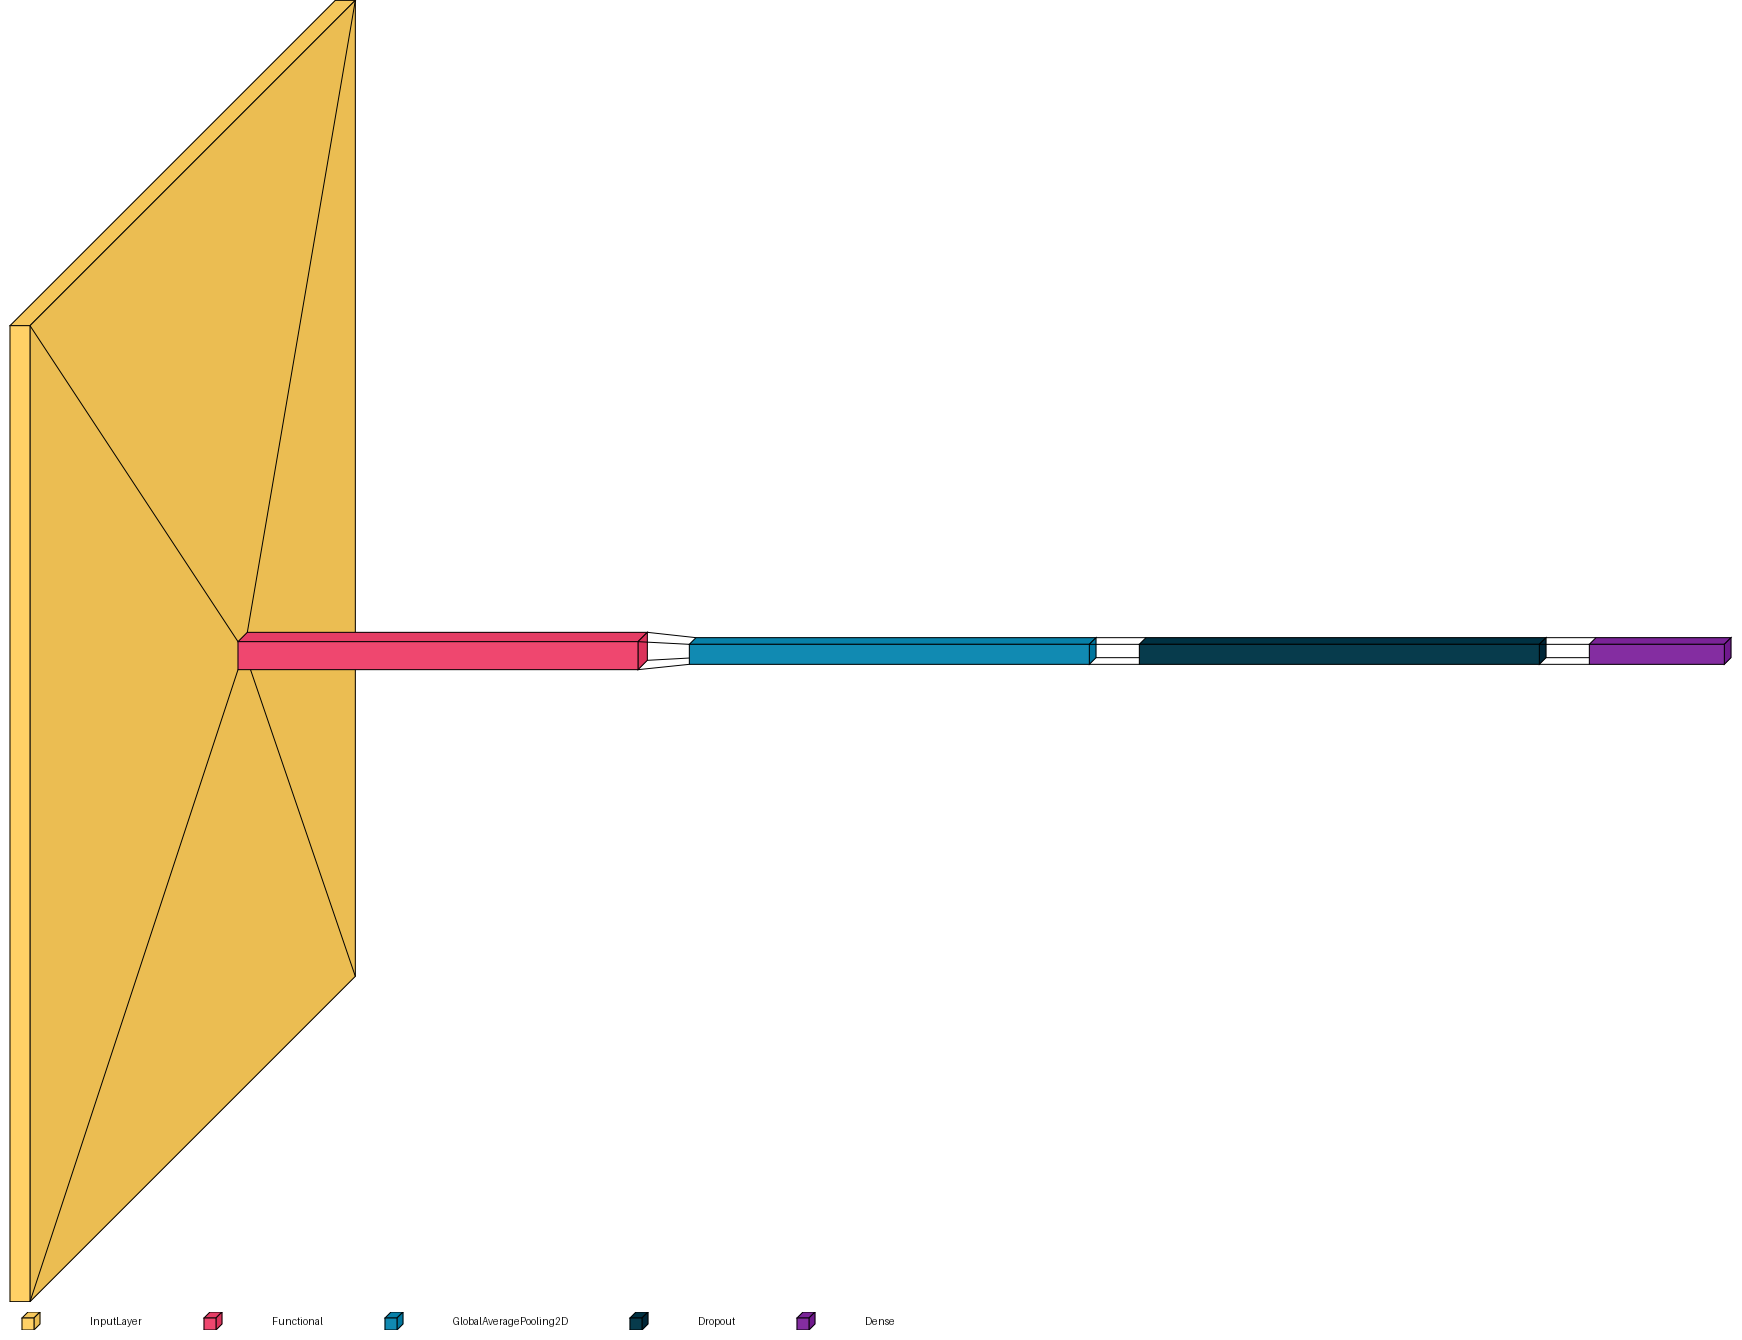

In [15]:
!pip install visualkeras
import visualkeras
import tensorflow as tf

def get_output_shape(self):
    if not hasattr(self, 'output'):
        return None
    if isinstance(self.output, list):
        return [tuple(o.shape) for o in self.output]
    return tuple(self.output.shape)

if not hasattr(tf.keras.layers.Layer, 'output_shape'):
    tf.keras.layers.Layer.output_shape = property(get_output_shape)
if not hasattr(tf.keras.layers.InputLayer, 'output_shape'):
    tf.keras.layers.InputLayer.output_shape = property(get_output_shape)

visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.1554 - loss: 9.2498 - val_accuracy: 0.2994 - val_loss: 4.0970
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.3037 - loss: 4.8112 - val_accuracy: 0.4576 - val_loss: 2.7142
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.4082 - loss: 3.3858 - val_accuracy: 0.5311 - val_loss: 2.0587
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.4520 - loss: 2.7187 - val_accuracy: 0.5537 - val_loss: 1.7697
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5381 - loss: 2.2524 - val_accuracy: 0.6328 - val_loss: 1.4955
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5763 - loss: 1.7360 - val_accuracy: 0.6102 - val_loss: 1.3378
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.5960 - loss: 1.5779 - val_accuracy: 0.6215 - val_loss: 1.2660
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.6653 - loss: 1.3602 - val_accuracy: 0.6610 - val_lo

In [18]:
#fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 244, 244,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 244, 244,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 90)        │     46,170 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,853,200 (56.66 MB)

 Trainable params: 7,125,594 (27.18 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 92,342 (360.71 KB)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6709 - loss: 1.0053 - val_accuracy: 0.7119 - val_loss: 0.7545
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.8559 - loss: 0.4312 - val_accuracy: 0.7571 - val_loss: 0.6367
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9237 - loss: 0.2380 - val_accuracy: 0.8305 - val_loss: 0.5002
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9562 - loss: 0.1542 - val_accuracy: 0.8192 - val_loss: 0.5518
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9661 - loss: 0.1108 - val_accuracy: 0.8079 - val_loss: 0.6650
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.9802 - loss: 0.0723 - val_accuracy: 0.8079 - val_loss: 0.7119
Epoch 6: early stopping


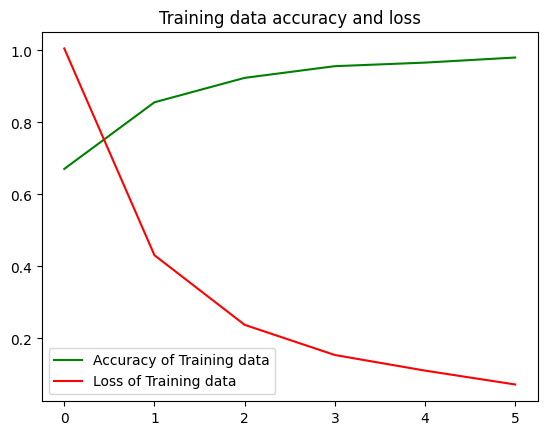

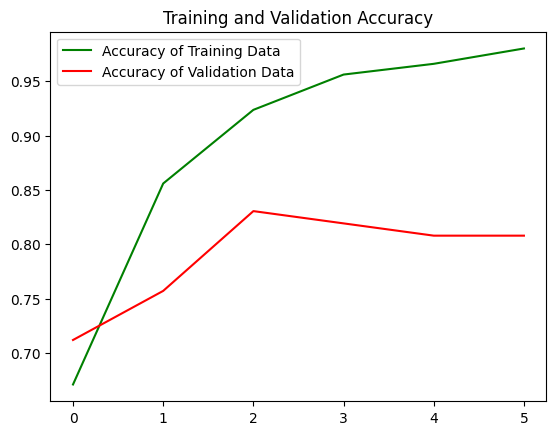

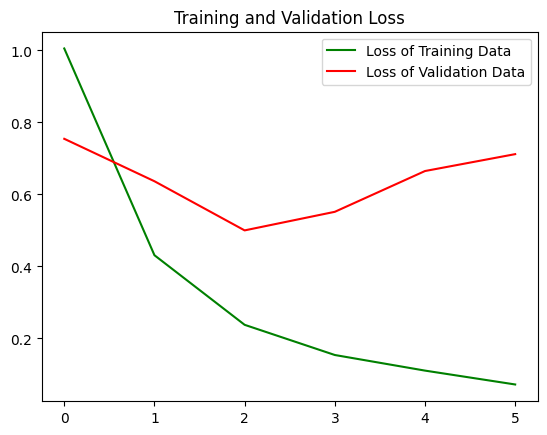

<Figure size 640x480 with 0 Axes>

In [21]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8079 - loss: 0.7119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


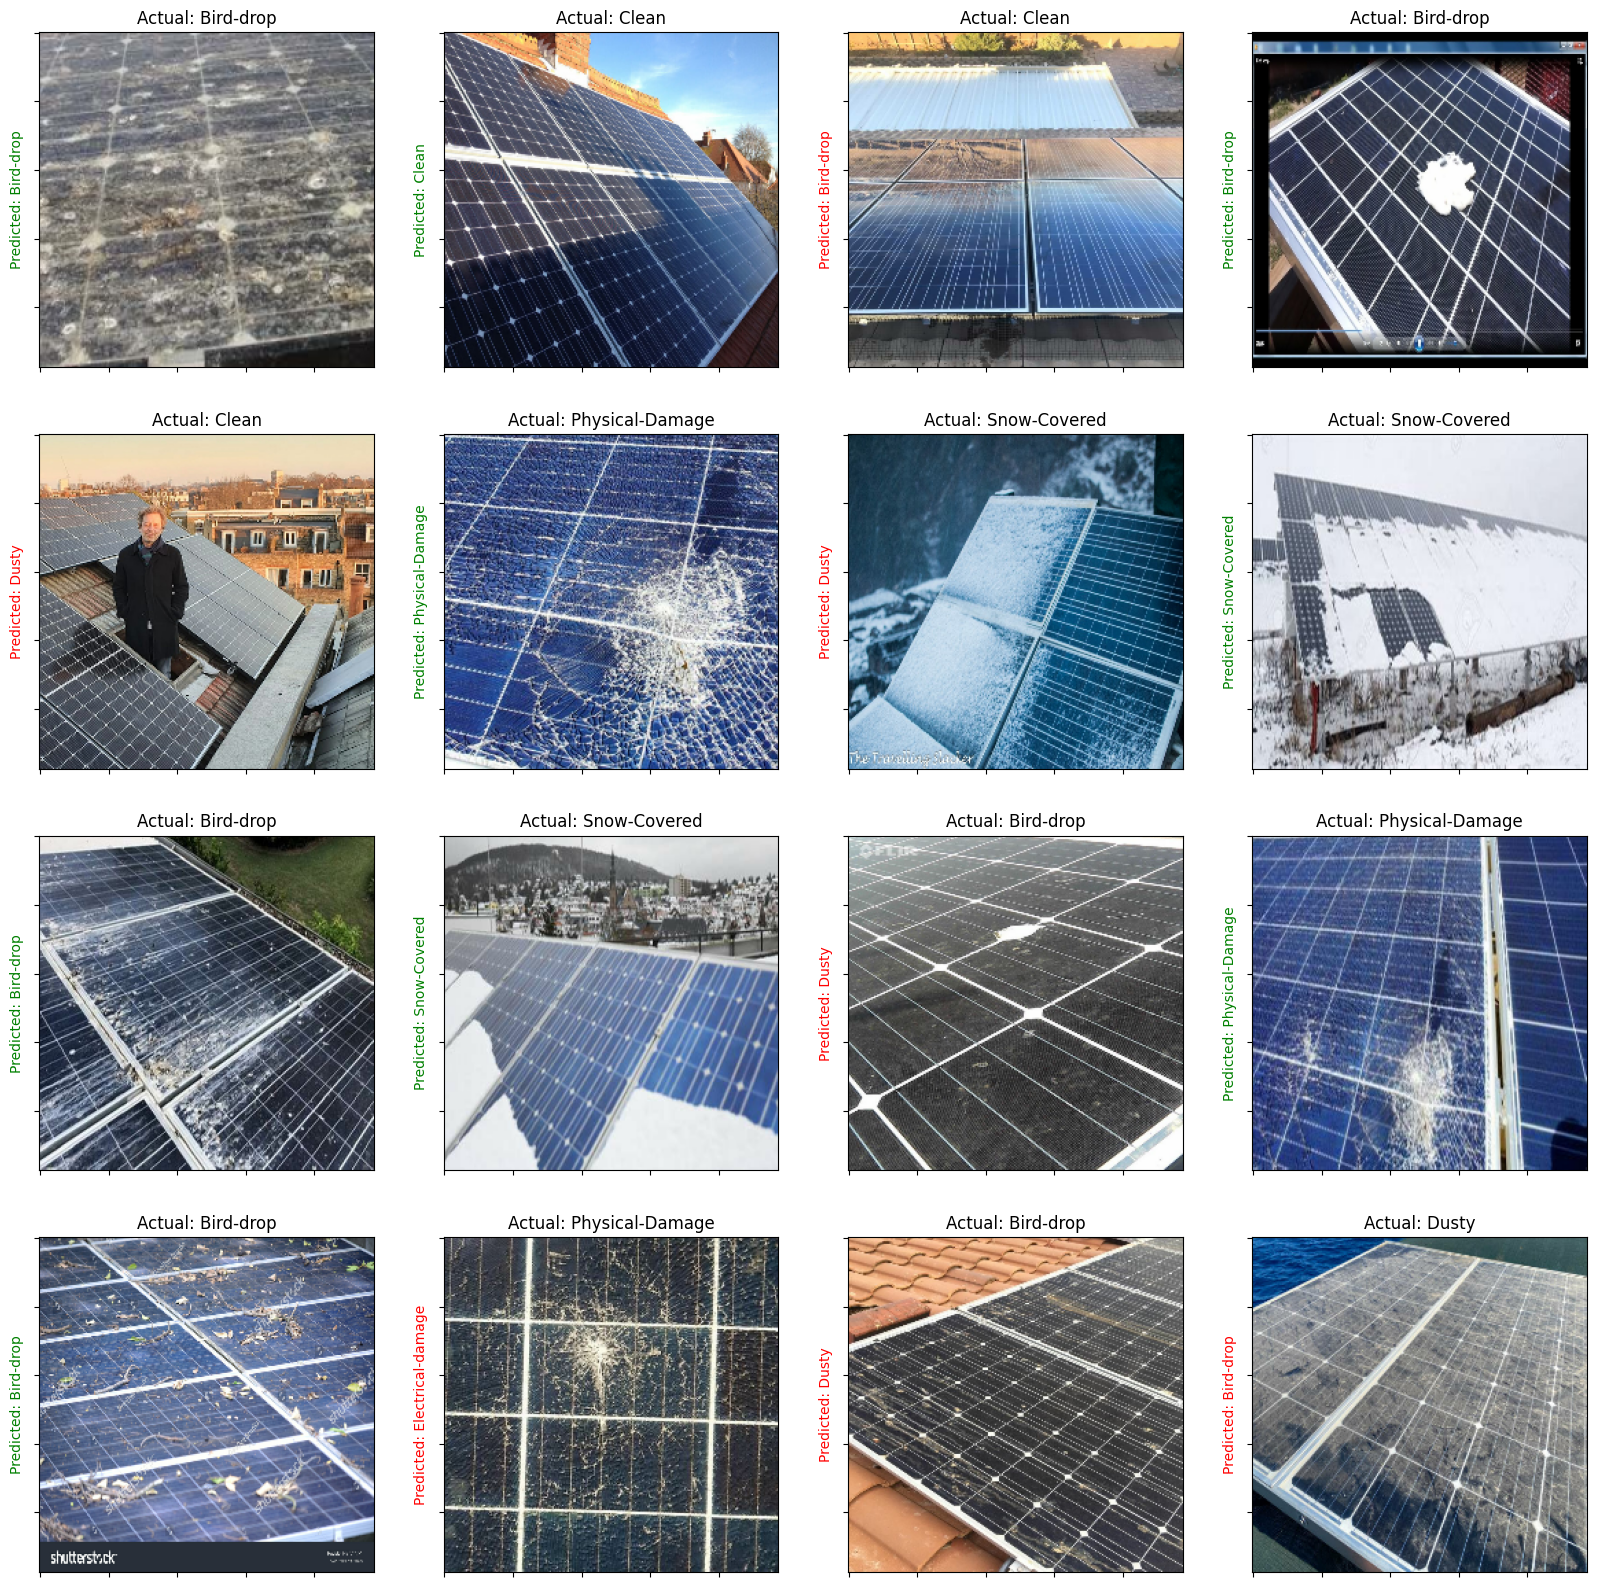

In [22]:
oss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])